In [143]:
import pandas as pd 
import numpy as np

In [144]:
df_fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
df_fert.columns.astype(int)
df_fert.index
df_fert.index.name ='country'
df_fert = df_fert.reset_index()
df_fert = df_fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
df_fert['year'] = df_fert['year'].astype(int)
df_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56160 entries, 0 to 56159
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         56160 non-null  object 
 1   year            56160 non-null  int32  
 2   fertility_rate  43412 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ MB


In [145]:
df_life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
df_life.columns.astype(int)
df_life.index
df_life.index.name ='country'
df_life = df_life.reset_index()
df_life = df_life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
df_life['year'] = df_life['year'].astype(int)
df_life

country  year  life_expectancy
0                   Abkhazia  1800              NaN
1                Afghanistan  1800            28.21
2      Akrotiri and Dhekelia  1800              NaN
3                    Albania  1800            35.40
4                    Algeria  1800            28.82
...                      ...   ...              ...
56415             Yugoslavia  2016              NaN
56416                 Zambia  2016            57.10
56417               Zimbabwe  2016            61.69
56418                  Åland  2016              NaN
56419            South Sudan  2016            56.10

[56420 rows x 3 columns]

In [146]:
df_fert.info()
df_life.info()
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56160 entries, 0 to 56159
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         56160 non-null  object 
 1   year            56160 non-null  int32  
 2   fertility_rate  43412 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56420 non-null  object 
 1   year             56420 non-null  int32  
 2   life_expectancy  43857 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22275 entries, 0 to 22274
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0 

In [147]:
df_pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
#df_pop.reset_index()
#df_pop.set_index('Total population')
df_pop.index.name ='country' 
df_pop = df_pop.reset_index()
df_pop = df_pop.melt(id_vars='country', var_name='year', value_name='total_population')
df_pop['year'] = df_pop['year'].astype(int)
df_pop

country  year  total_population
0                                          Abkhazia  1800               NaN
1                                       Afghanistan  1800         3280000.0
2                             Akrotiri and Dhekelia  1800               NaN
3                                           Albania  1800          410445.0
4                                           Algeria  1800         2503218.0
...                                             ...   ...               ...
22270                             Northern Marianas  2015               NaN
22271  South Georgia and the South Sandwich Islands  2015               NaN
22272                     US Minor Outlying Islands  2015               NaN
22273                                Virgin Islands  2015               NaN
22274                                     West Bank  2015               NaN

[22275 rows x 3 columns]

In [169]:
df_fert = df_fert.sort_values(by=['country'])
df_pop = df_pop.sort_values(by=['country'])
df_life = df_life.sort_values(by=['country'])
df = df_pop.merge(df_life)
df = df.merge(df_fert)
df

country  year  total_population  life_expectancy  fertility_rate
0      Abkhazia  1800               NaN              NaN             NaN
1      Abkhazia  1994               NaN              NaN             NaN
2      Abkhazia  1987               NaN              NaN             NaN
3      Abkhazia  2005               NaN              NaN             NaN
4      Abkhazia  1986               NaN              NaN             NaN
...         ...   ...               ...              ...             ...
20974     Åland  1968           20729.0              NaN             NaN
20975     Åland  2015               NaN              NaN             NaN
20976     Åland  2015               NaN              NaN             NaN
20977     Åland  2000           25813.0             80.0             NaN
20978     Åland  2000           25813.0             80.0             NaN

[20979 rows x 5 columns]

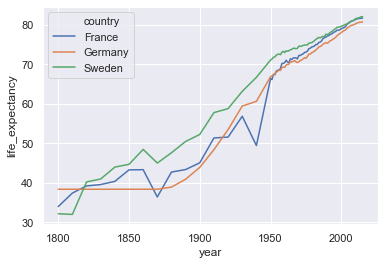

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df_subset = df.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
            data=df_subset)

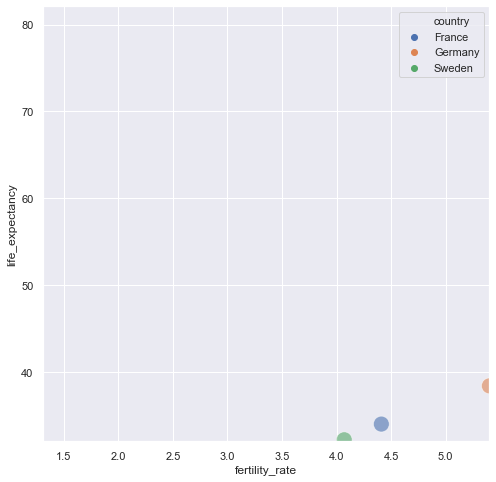

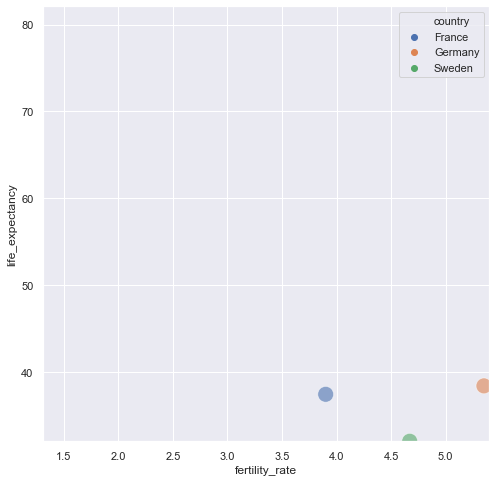

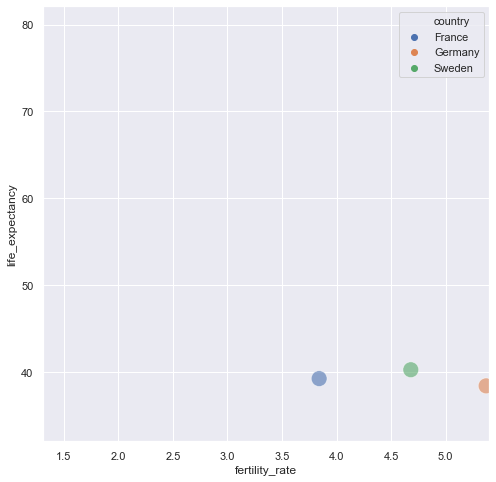

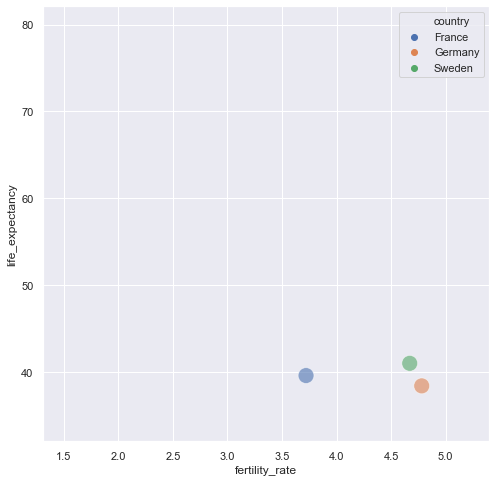

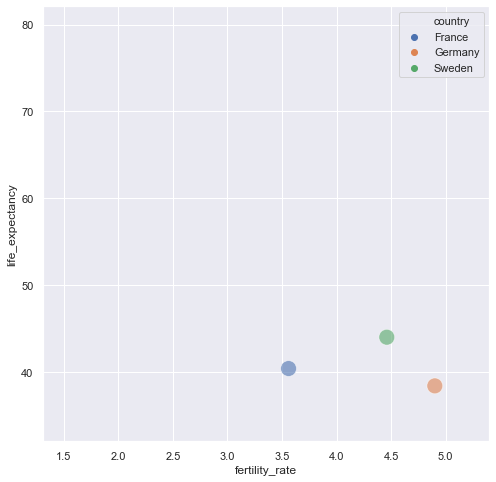

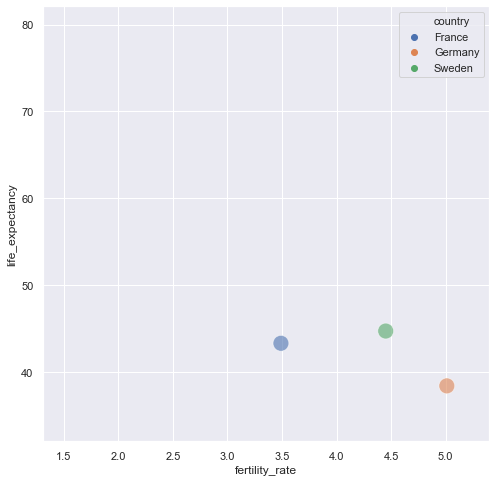

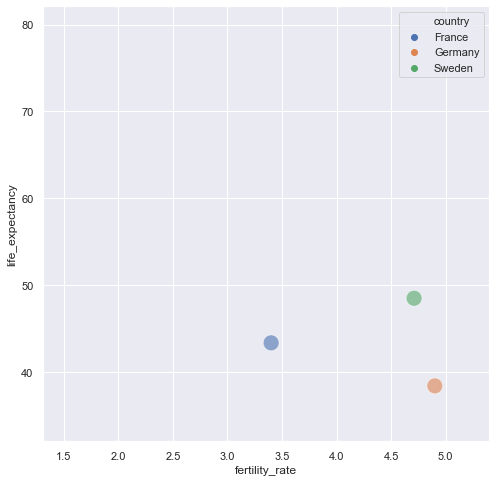

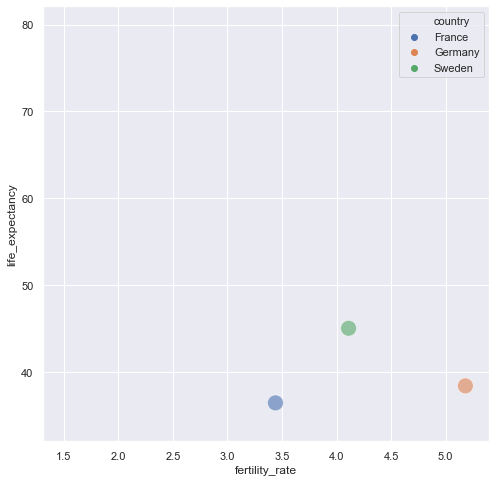

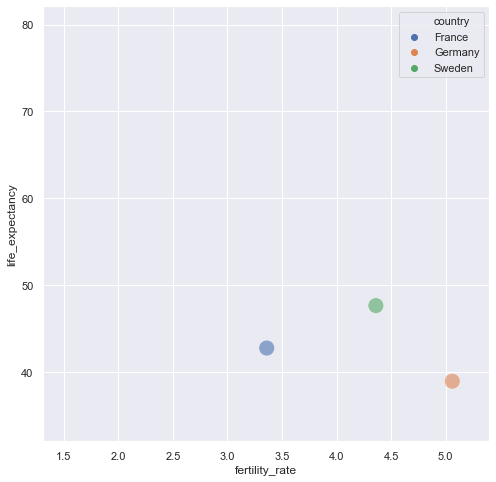

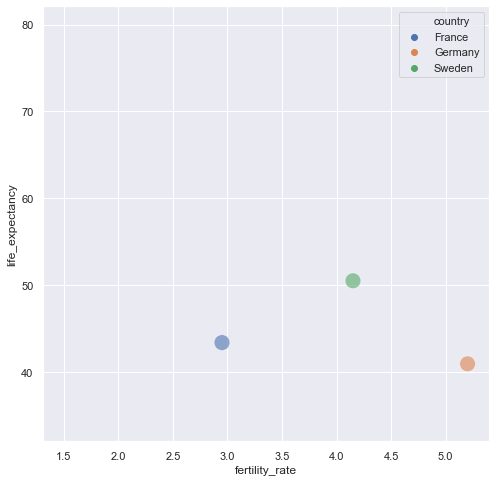

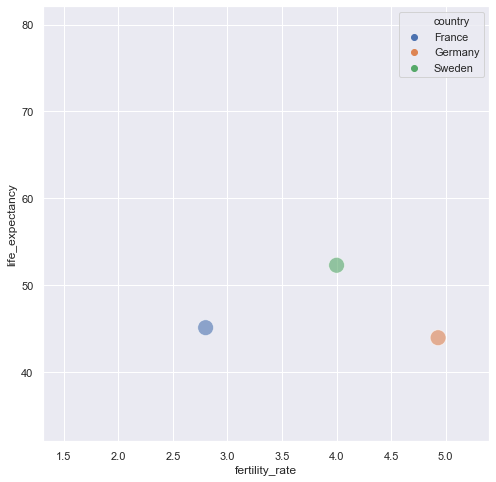

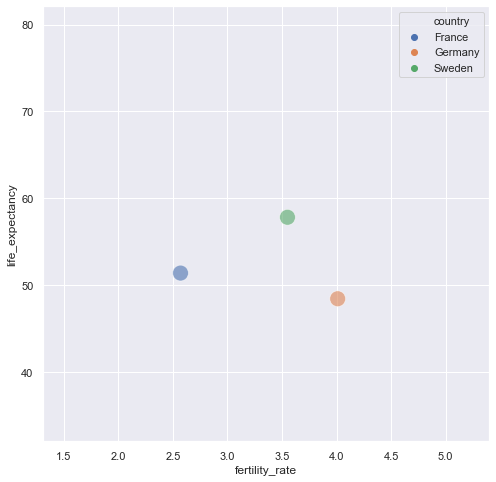

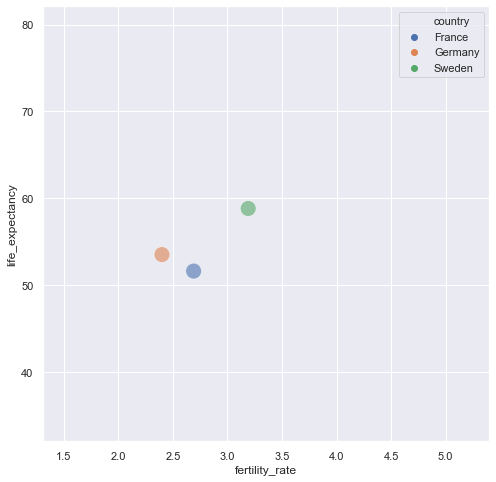

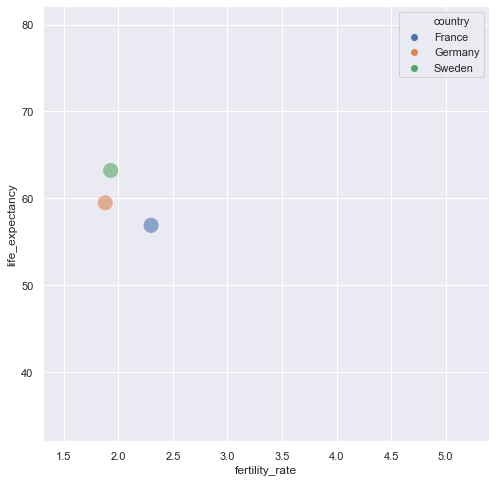

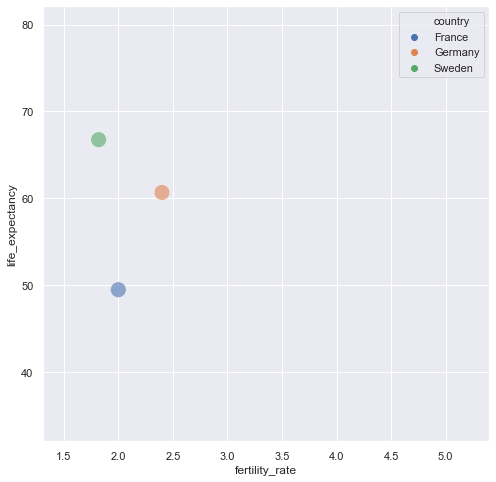

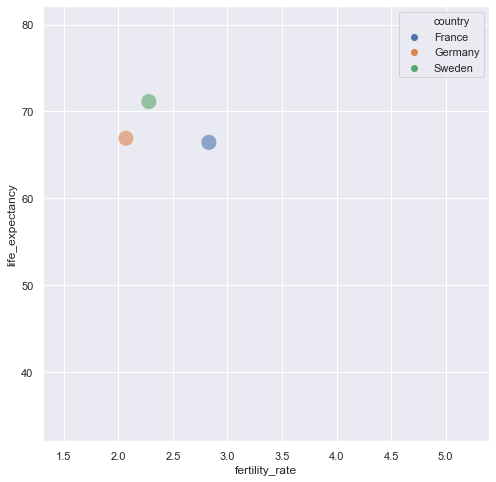

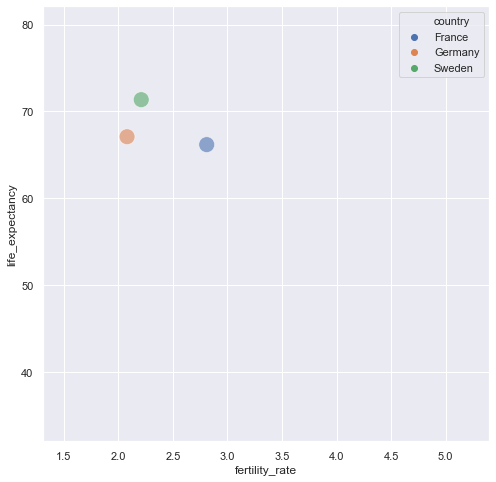

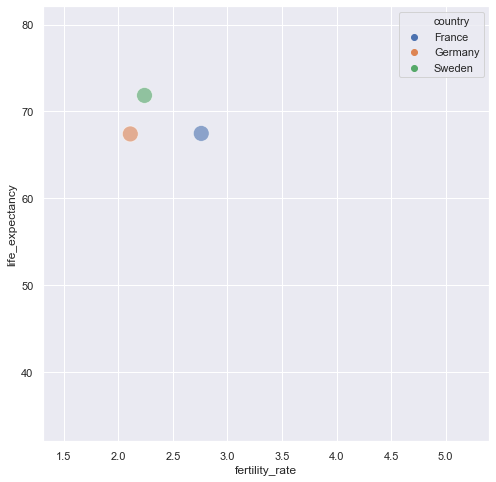

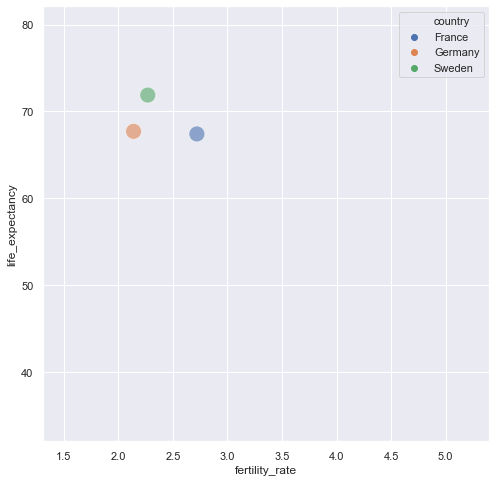

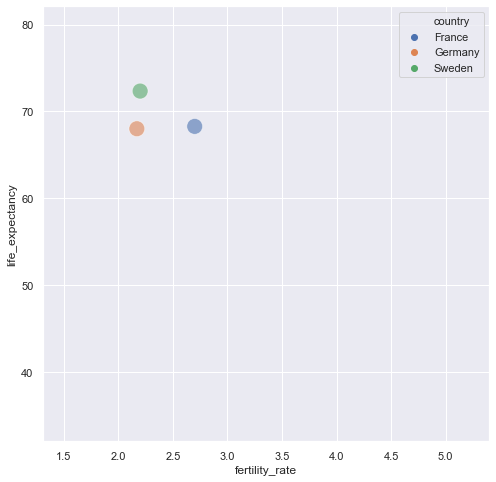

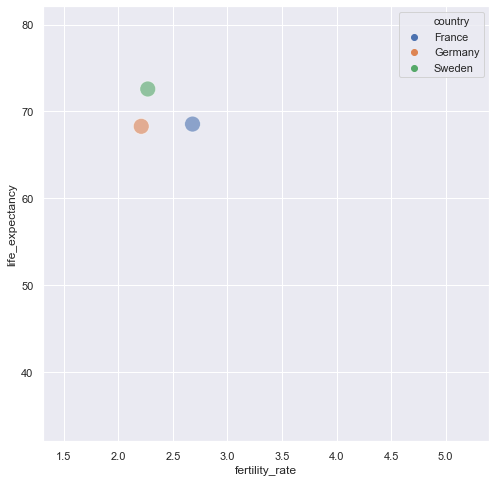

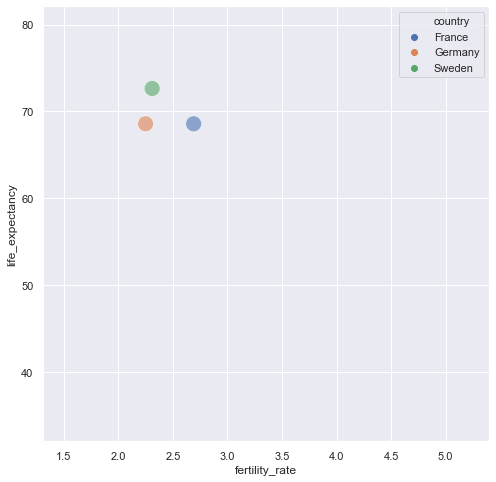

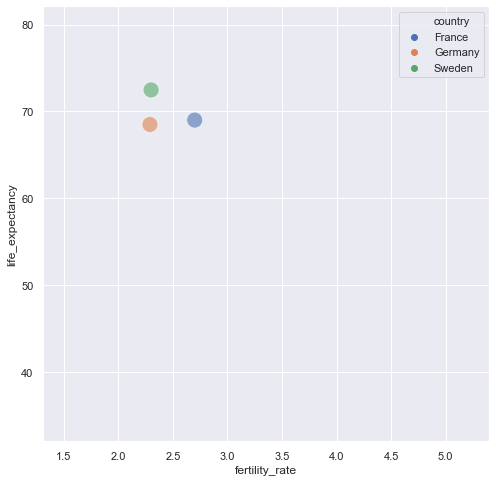

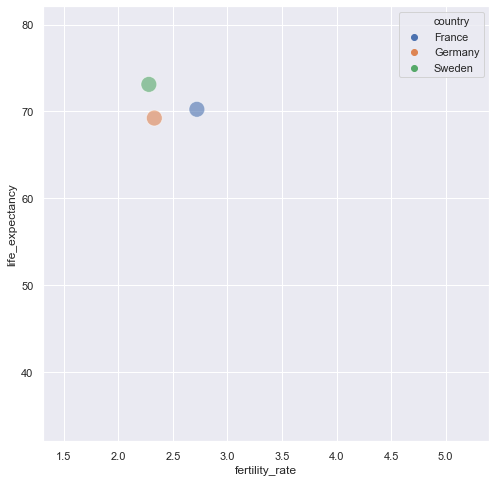

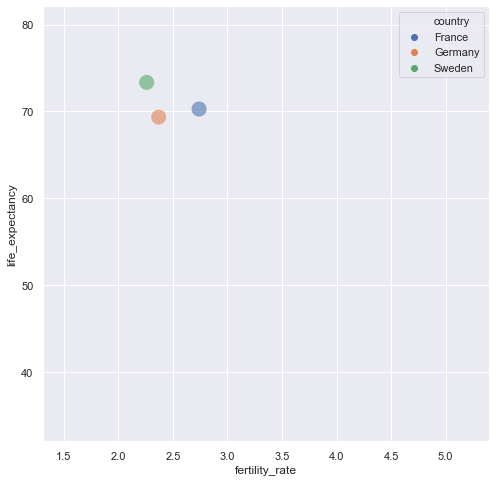

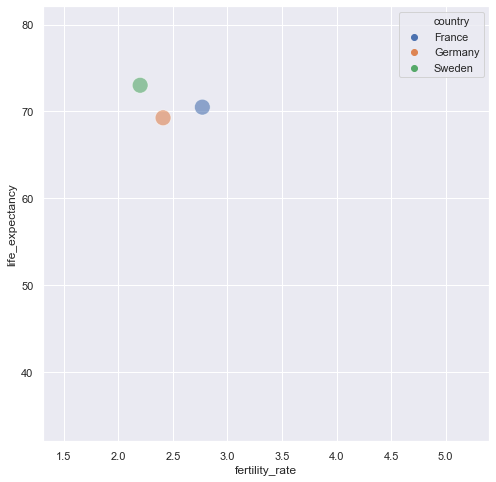

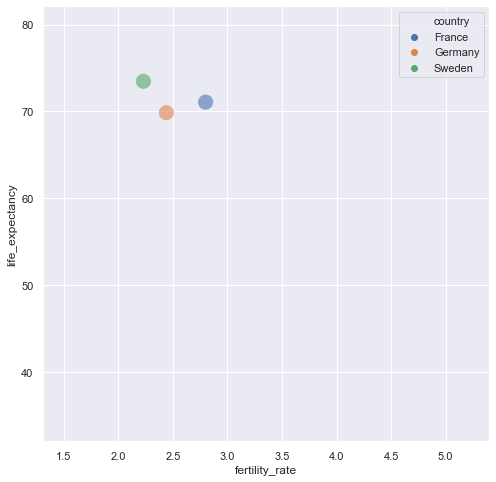

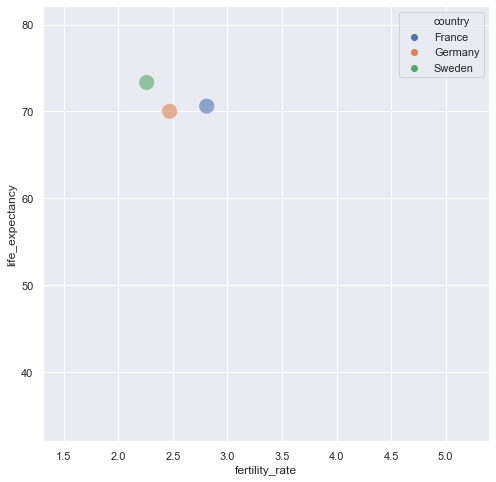

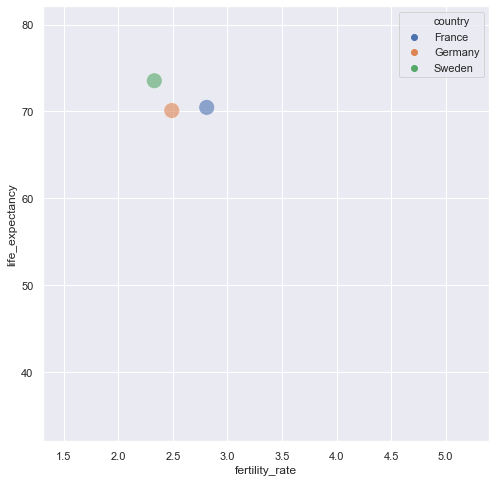

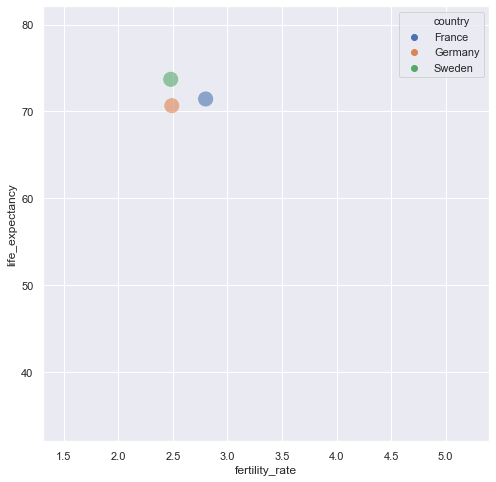

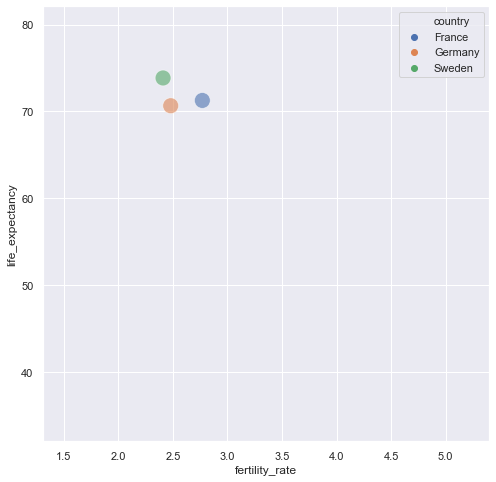

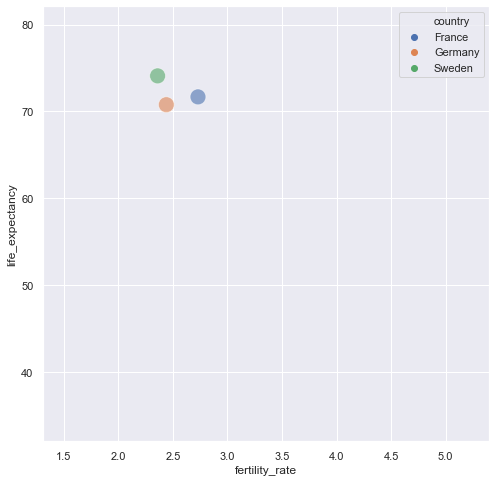

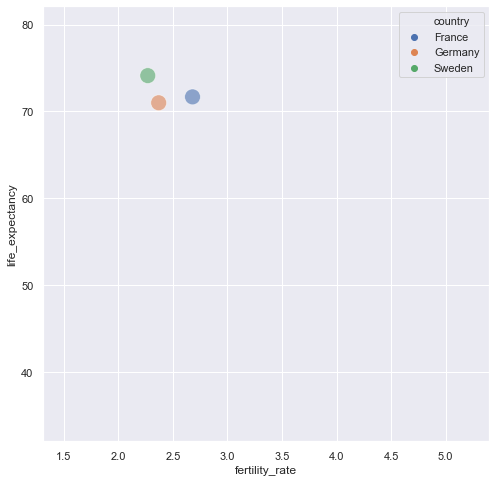

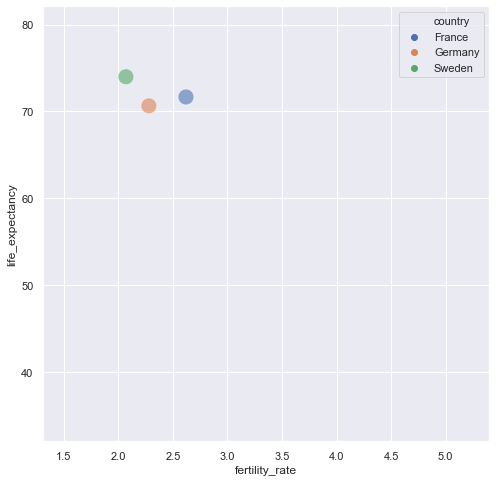

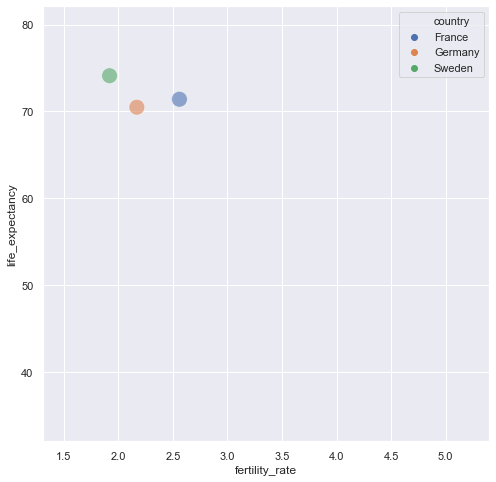

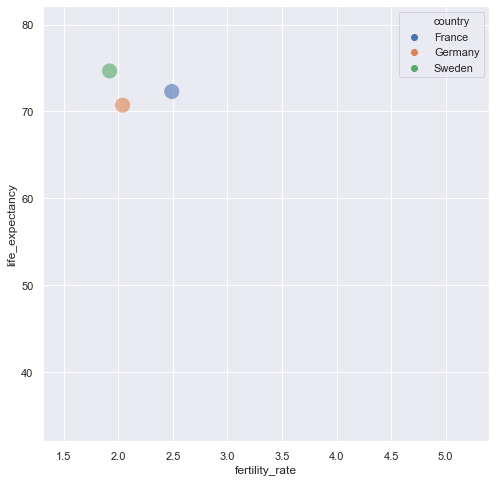

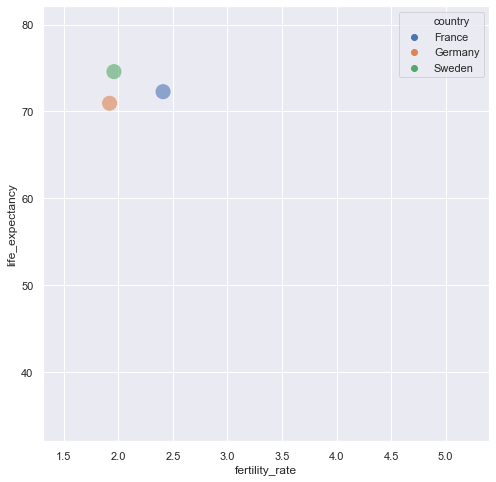

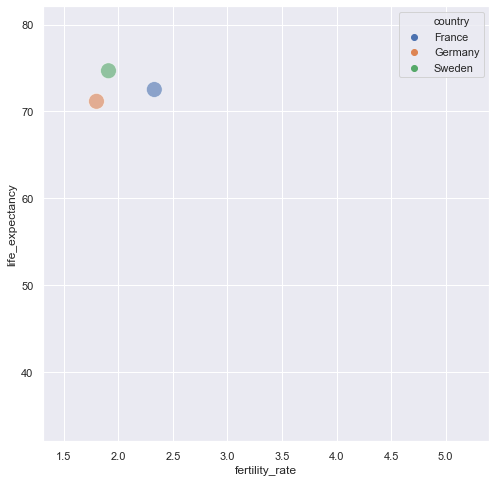

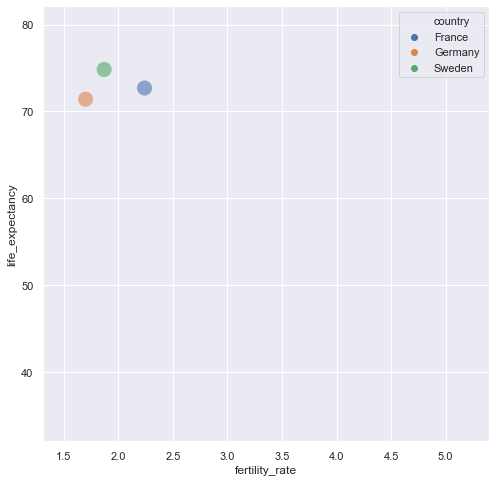

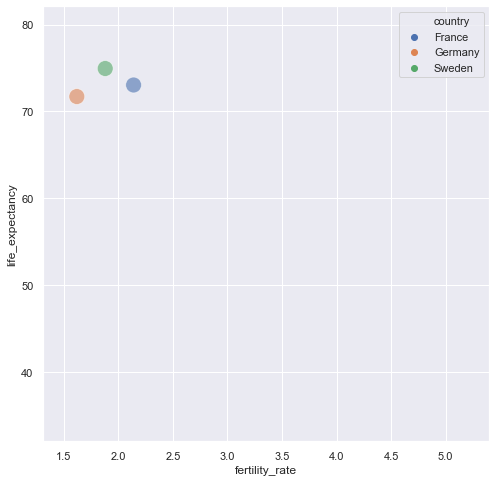

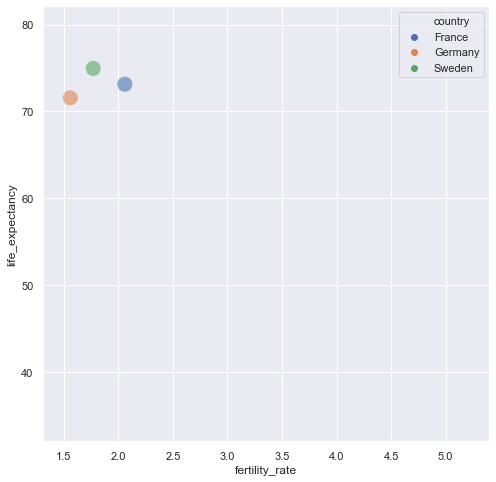

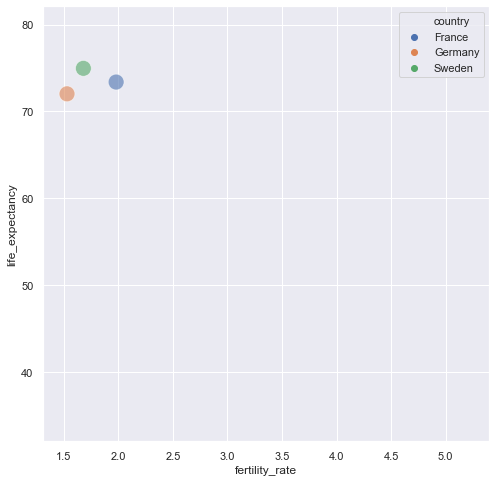

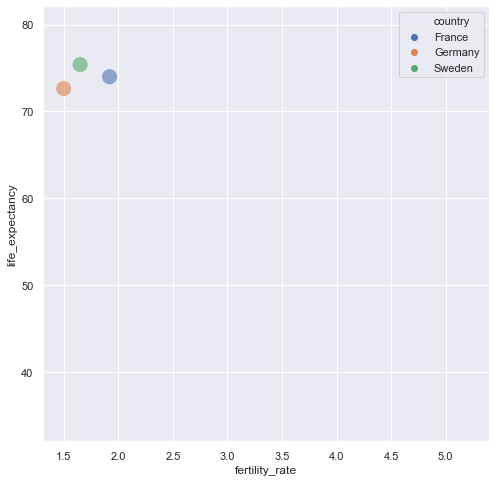

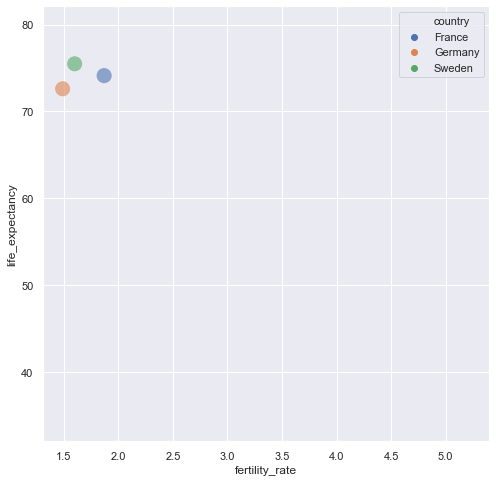

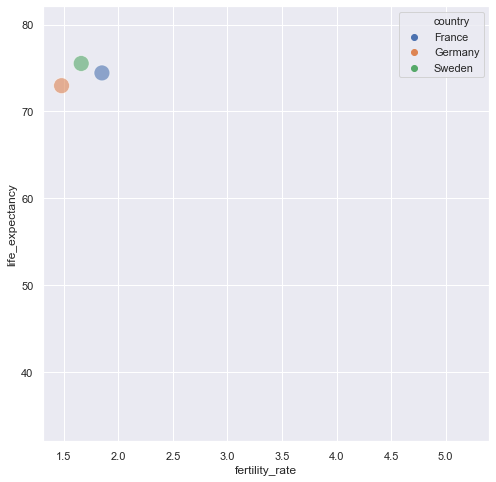

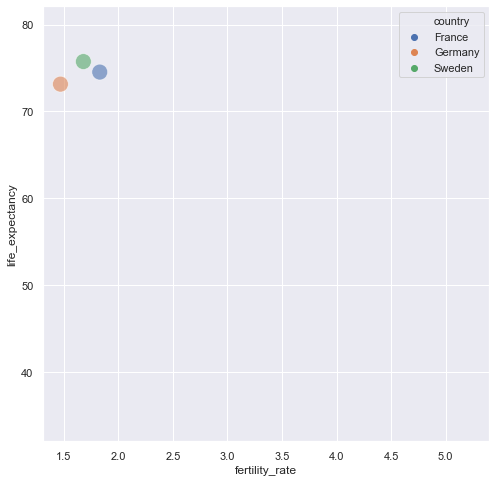

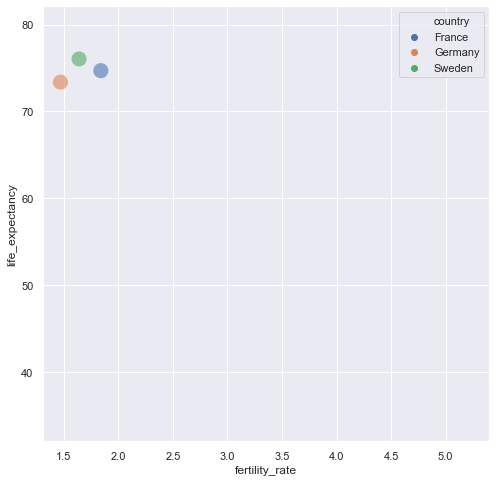

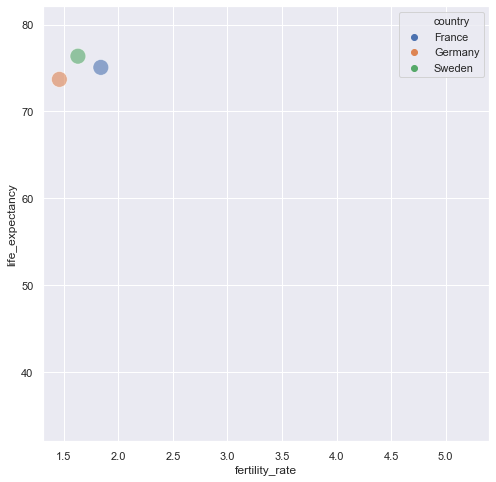

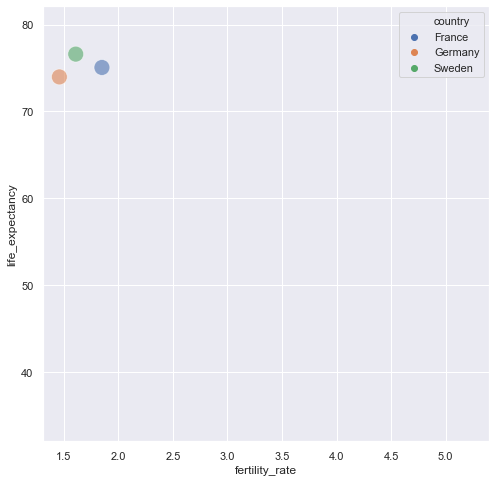

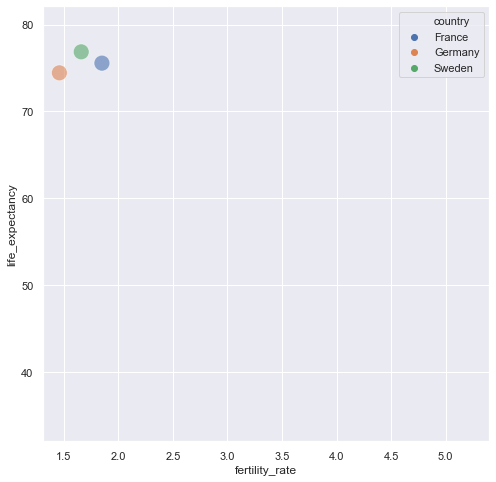

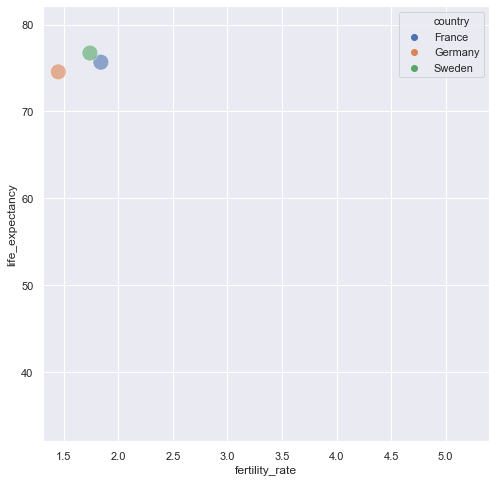

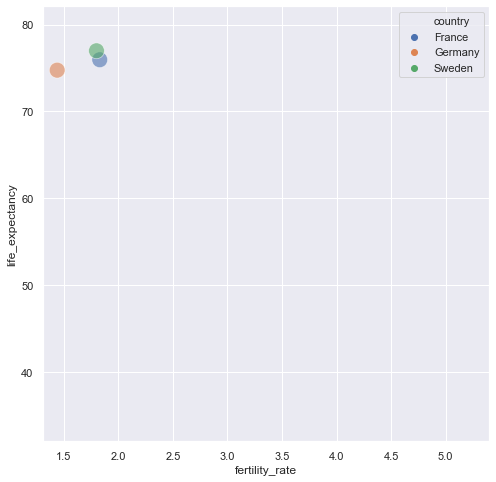

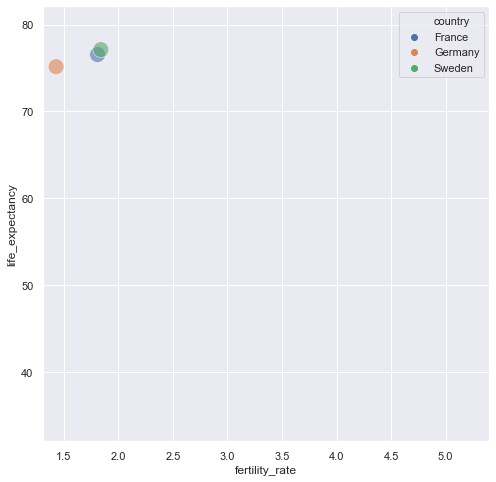

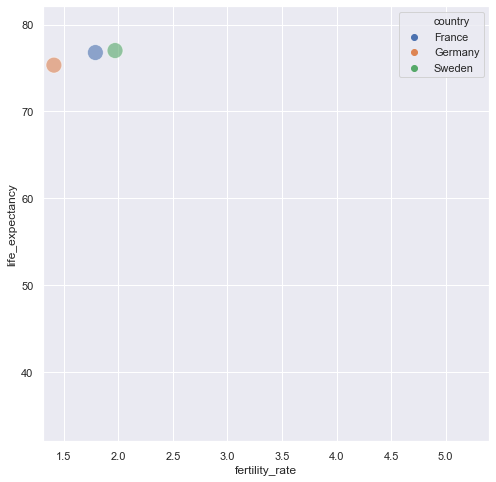

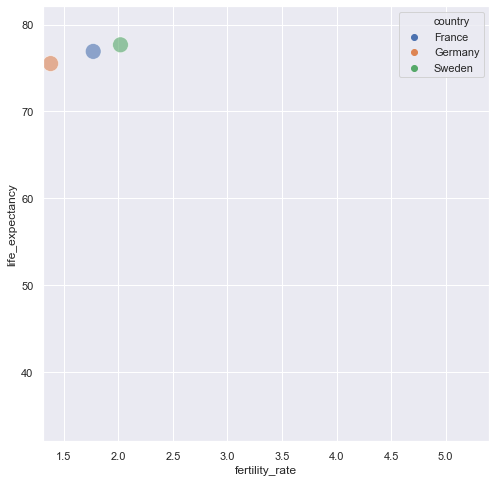

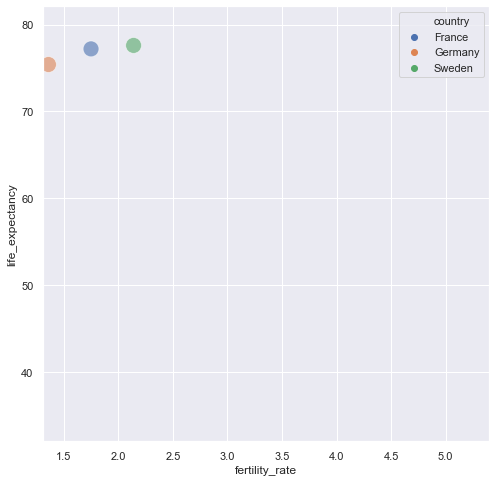

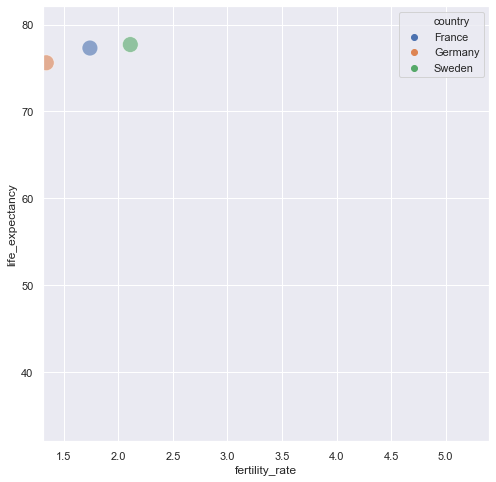

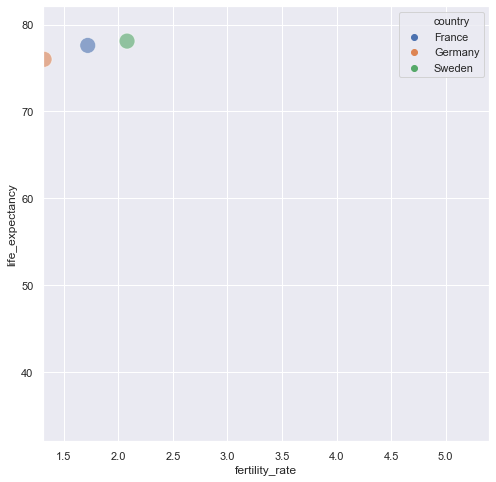

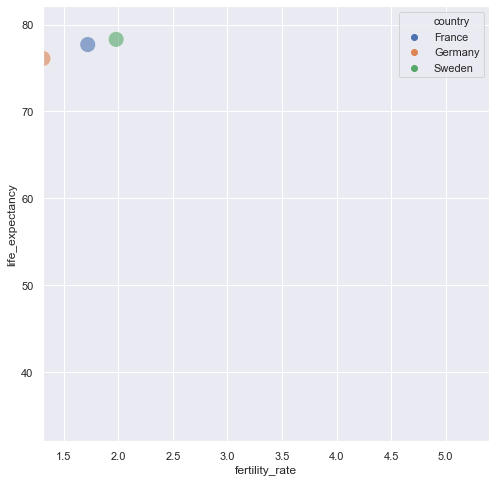

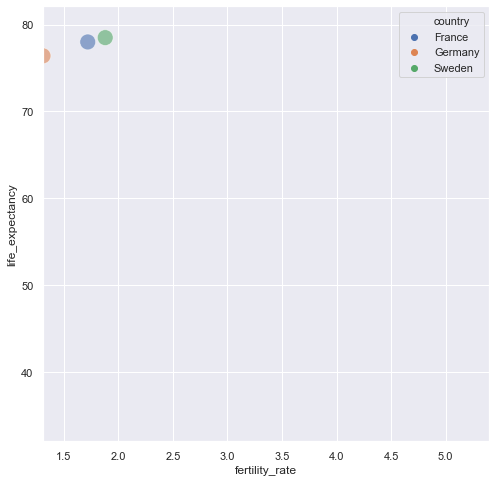

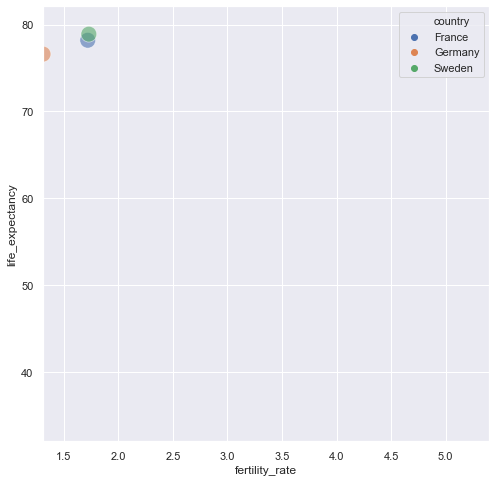

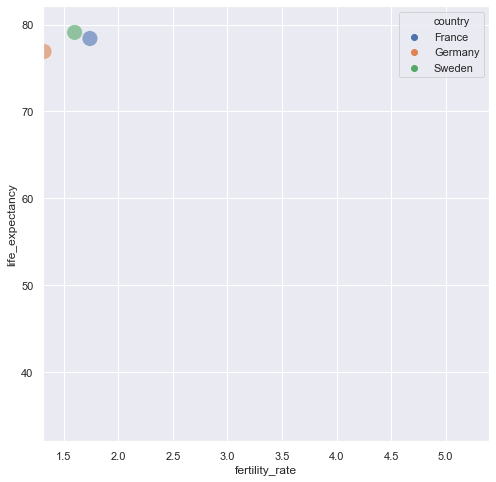

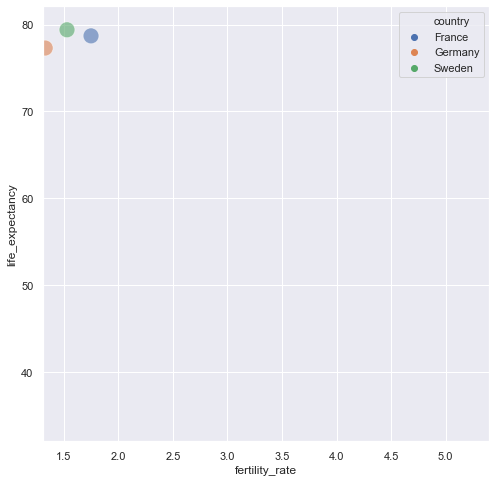

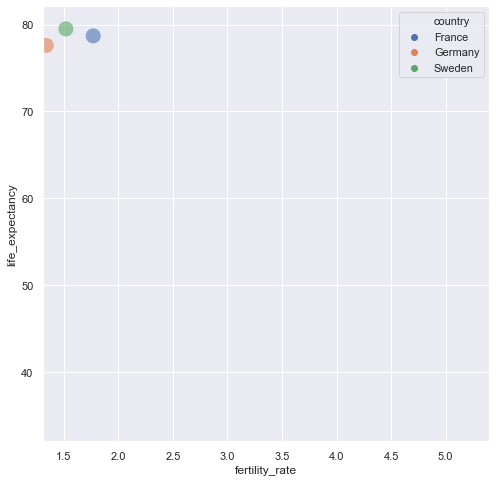

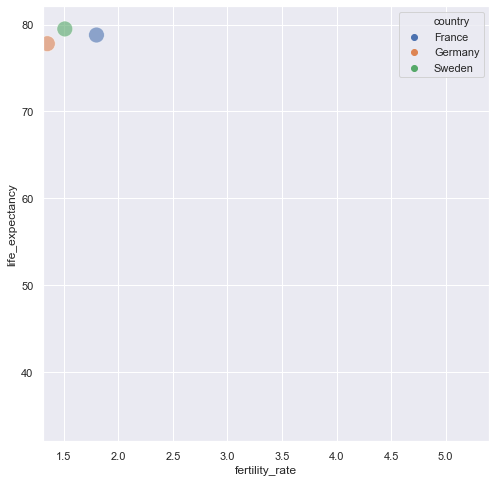

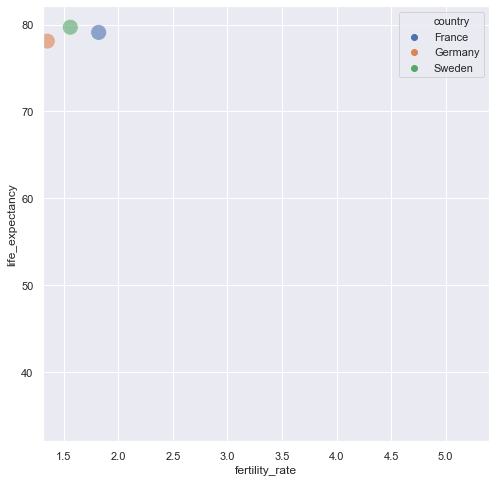

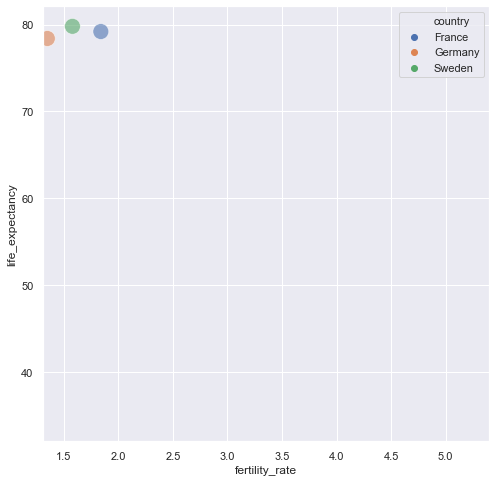

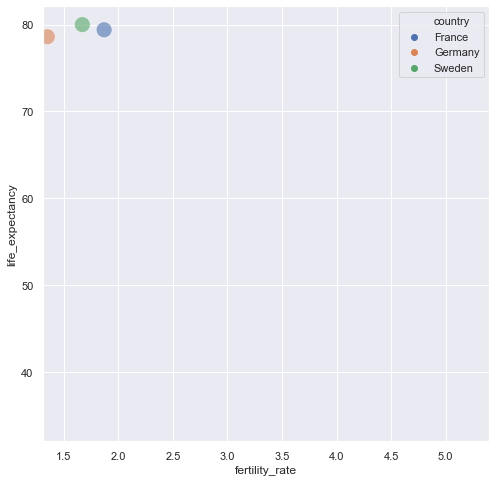

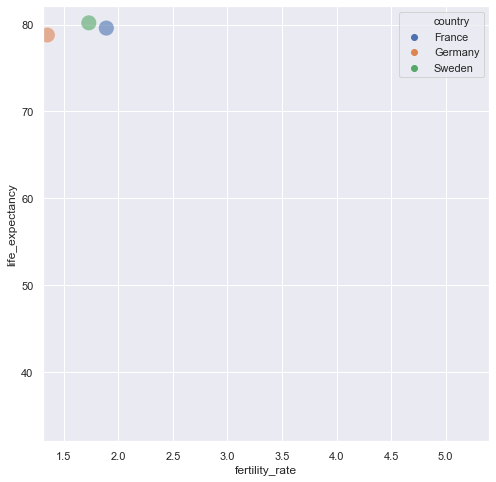

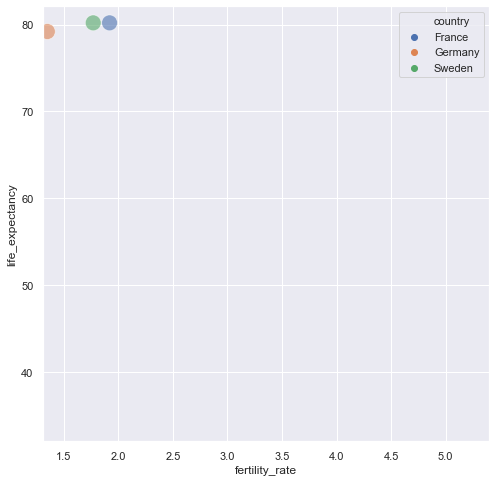

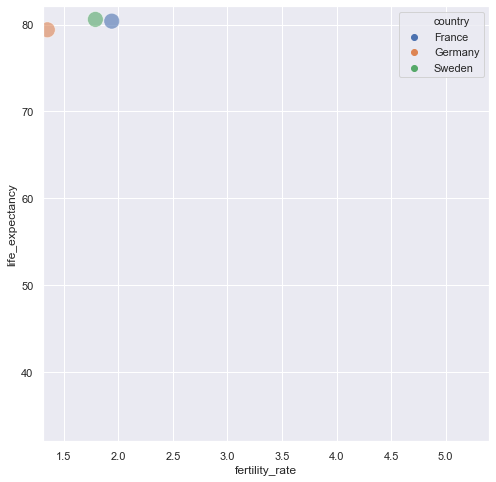

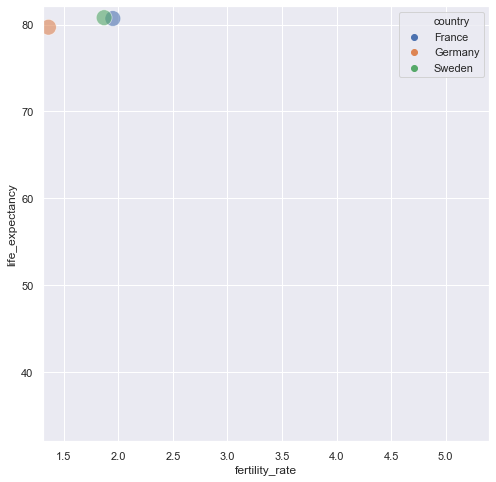

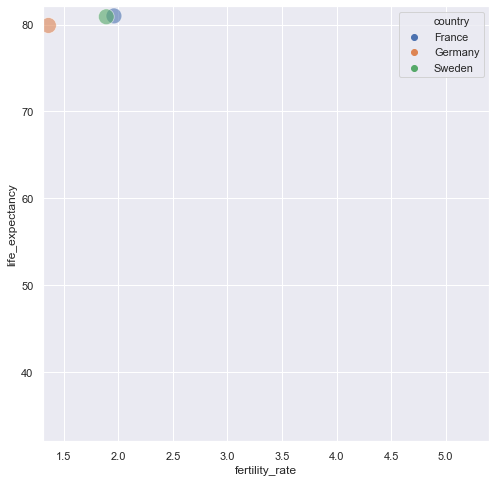

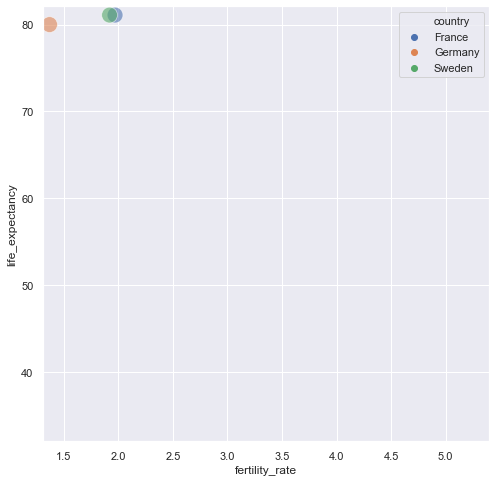

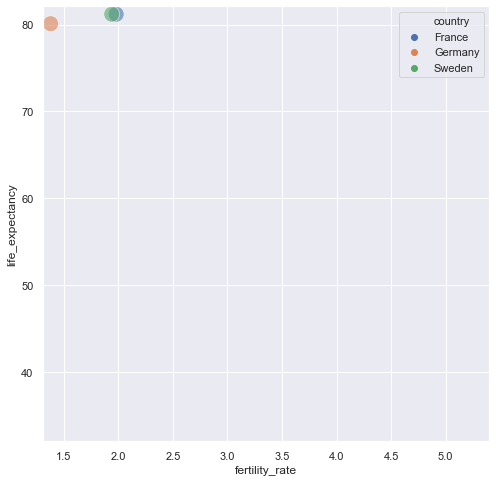

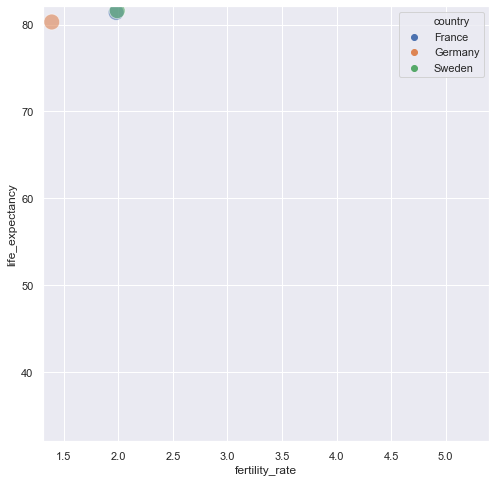

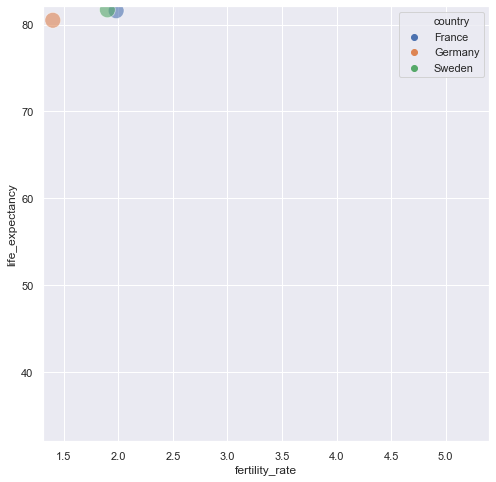

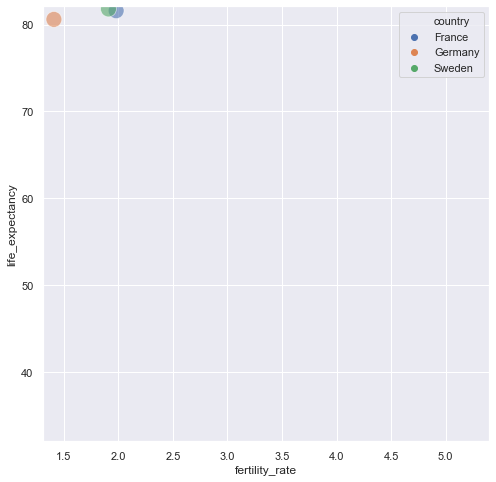

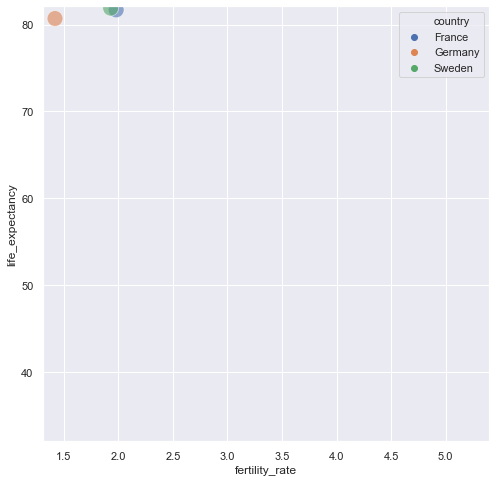

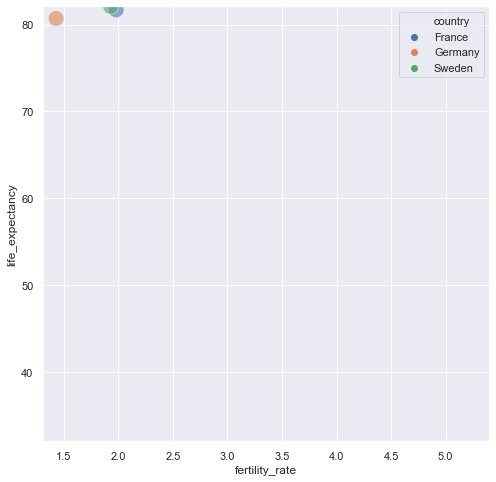

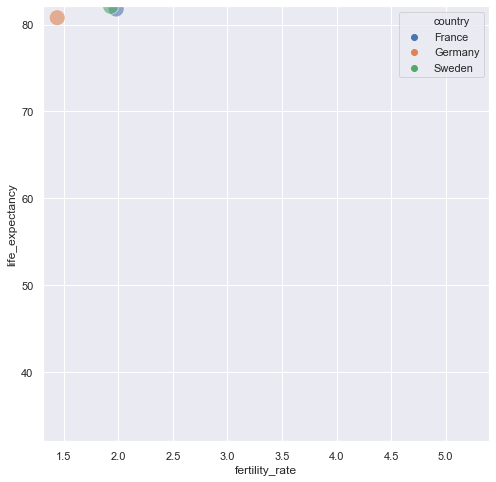

In [187]:
for i in list(set(df_subset['year'])):
    plt.figure(figsize=(8,8))
    ax=sns.scatterplot(x='fertility_rate', y='life_expectancy', data=df_subset[df_subset['year']==i], hue='country', alpha=0.6, s=250)
    plt.axis((df_subset['fertility_rate'].min(), df_subset['fertility_rate'].max(), df_subset['life_expectancy'].min(), df_subset['life_expectancy'].max()))
    plt.savefig(f'lifexp_{i}')

In [188]:
import imageio

images = []

for i in sorted(set(df_subset['year'])):
    filename = 'lifexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('animation.gif', images, fps=2)

In [189]:
import os

for i in sorted(set(df_subset['year'])):
    os.remove('lifexp_{}.png'.format(i))